In [5]:
import pyaudio 
import numpy as np
import wave
import matplotlib.pyplot as plt
import sys 
import os 
import struct
import scipy.io.wavfile as sp

Recording started. Start talking :)
Recording completed.
length = 4.992290249433107


D:\downloads\anaconda\lib\site-packages\IPython\core\pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


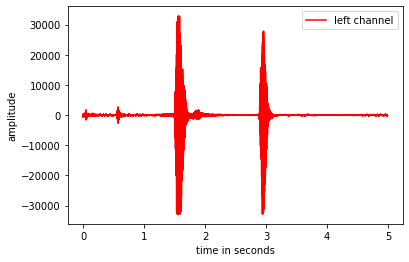

In [23]:
def record(outputFile):
    
    CHUNK = 1024
    #32 bytes per sample
    FORMAT= pyaudio.paInt16
    CHANNEL = 1
    #44100 cycles per second
    RATE = 44100
    RECORD_SECONDS = 5
    
    #instantiate
    p = pyaudio.PyAudio()
    #open Stream, with input
    stream = p.open(format=FORMAT,
                    channels = CHANNEL,
                    rate=RATE,
                    input=True,
                    frames_per_buffer=CHUNK    
    )
    
    print("Recording started. Start talking :)")
    #we need to define a frame
    frames = []
    #44100/1024*5
    for i in range(0, int(RATE/CHUNK*RECORD_SECONDS)):
        frames.append(stream.read(CHUNK))
    
    # Stop and close the stream 
    stream.stop_stream()
    stream.close()
    # Terminate the PortAudio interface
    p.terminate()
    print('Recording completed.')

    #now once we have done the recording we use the wav module
    #open the file in binary mode
    wf = wave.open(outputFile, 'wb')
    #need to set like before - channels,sampwidth,framerate.
    wf.setnchannels(CHANNEL)
    wf.setsampwidth(p.get_sample_size(FORMAT))
    wf.setframerate(RATE)
    #this is how to join the frame together.
    wf.writeframes(b''.join(frames))
    wf.close()
    
#1st part
#store recording with title output record.wav 
if os.path.isfile("C:/Users/OEM/record1.wav"):
    os.remove("C:/Users/OEM/record1.wav")

r = record('record1.wav')

#converting wav wfile to interpretable int
samplerate, data = sp.read("C:/Users/OEM/record1.wav")
length = data.shape[0]/samplerate
print(f"length = {length}")
time = np.linspace(0., length, data.shape[0])
plt.plot(time, data, label='left channel', color = 'red')
#plt.plot(time, data[:,1], label='right channel')
plt.legend()
plt.xlabel('time in seconds')
plt.ylabel('amplitude')
plt.show()